In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

Displaying the image

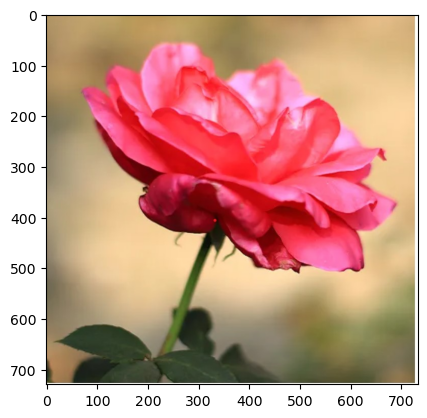

In [4]:
import cv2
import matplotlib.pyplot as plt

# Define the full path to the image file
image_path = r'C:\Users\Surayia Rahman\Downloads\rose.jpg'

# Load the image
img = cv2.imread(image_path)

# Check if the image has been loaded correctly
if img is None:
    print("Error: Image not found or path is incorrect")
else:
    # If loaded correctly, convert the color and display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()


In [5]:
img.shape

(729, 733, 3)

split the image into 3 channels

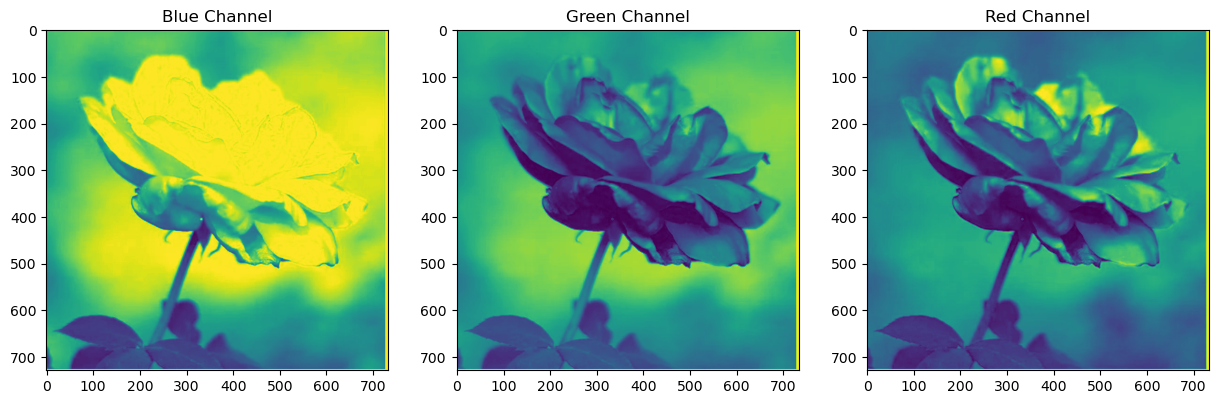

In [6]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [7]:
## verifying the data of the blue channel

blue_temp_df = pd.DataFrame(data = blue)
blue_temp_df

,0,1,2,3,4,5,6,7,8,9,...,723,724,725,726,727,728,729,730,731,732
0,178,178,178,178,178,178,178,178,179,179,...,219,216,210,199,255,255,255,255,255,255
1,178,178,178,178,178,178,178,178,179,179,...,219,216,210,199,255,255,255,255,255,255
2,178,178,178,178,178,178,178,178,179,179,...,219,216,210,199,255,255,255,255,255,255
3,178,178,178,178,178,178,178,178,179,179,...,219,216,210,199,255,255,255,255,255,255
4,178,178,178,178,178,178,178,178,179,179,...,219,216,210,199,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,95,89,82,74,69,68,71,77,80,85,...,129,113,122,113,255,255,255,255,255,255
725,105,103,100,95,87,80,76,74,78,81,...,122,123,120,107,255,255,255,255,255,255
726,104,106,108,107,100,93,84,80,80,82,...,112,120,107,118,253,255,255,255,255,255
727,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [8]:
# dividing all the data of all channels by 255 so that the data is scaled between 0 and 1.

df_blue = blue/255
df_green = green/255
df_red = red/255

In [9]:
# consider only 50 dimensions for PCA and fit and transform the data and check how much variance is explained after reducing data to 50 dimensions.

pca_b = PCA(n_components=50)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=50)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=50)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [10]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(729, 50)
(729, 50)
(729, 50)


In [11]:
# check the sum of explained variance ratios of the 50 PCA components (i.e. most dominated 50 Eigenvalues) for each channel.

print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9961981860394603
Green Channel: 0.9944670700941001
Red Channel  : 0.9918687791247207


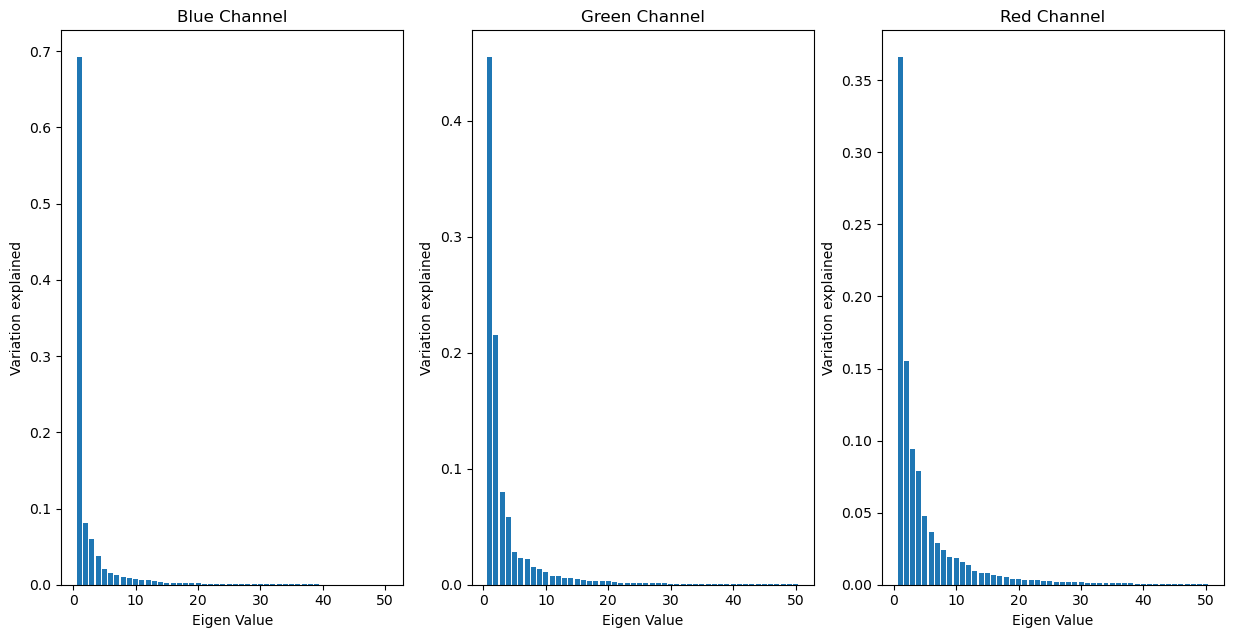

In [12]:
# bar charts to check the explained variance ratio by each Eigenvalues separately for each of the 3 channels

fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,51)),pca_r.explained_variance_ratio_)
plt.show()

In [13]:
# reverse transform the data and then merge the data of all the 3 channels into one

b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(729, 733) (729, 733) (729, 733)


In [14]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(729, 733, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


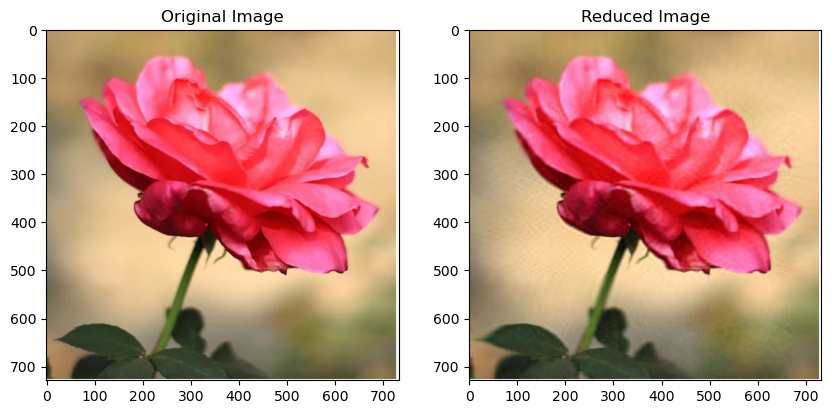

In [15]:
# display both the Images (original and reduced) side by side

fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()